In [1]:
import neal
from utils import load_clustering_ising
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams["font.size"] = 18

In [3]:
n_clusters = 3
n_points = 8

In [4]:
lci = load_clustering_ising(n_clusters, n_points, random_state=52)
Jm, hm = lci.get()

## Default (geometric)

In [5]:
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_ising(hm, Jm, num_sweeps=10000)

In [7]:
states = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/state.txt")
p_flip = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/p_flip.txt")
beta = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/beta.txt")

np.save('geometric/states.npy', states)
np.save('geometric/p_flip.npy', p_flip)
np.save('geometric/beta.npy', beta)

In [8]:
ens = [lci.calc_en(s) for s in states]

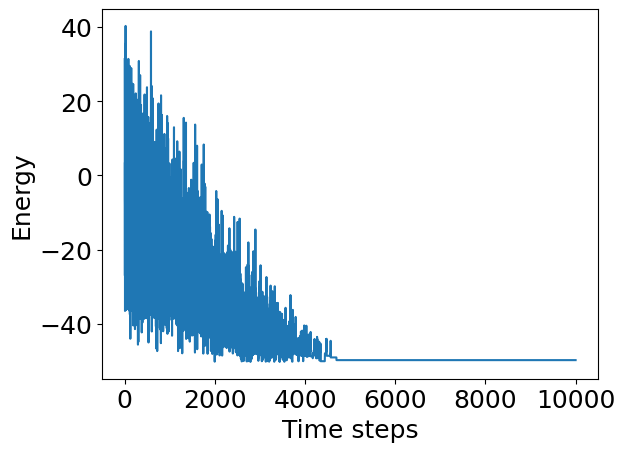

In [9]:
plt.plot(ens)
plt.xlabel("Time steps")
plt.ylabel("Energy")
plt.show()

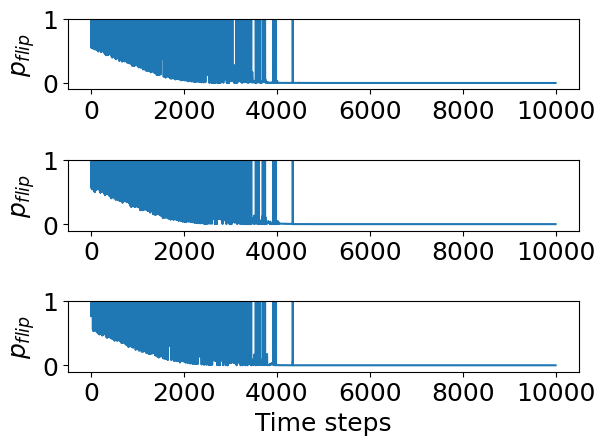

In [10]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(p_flip.T[0])
ax1.set_ylim(-0.1, 1)
ax1.set_ylabel("$p_{flip}$")

ax2.plot(p_flip.T[1])
ax2.set_ylim(-0.1, 1)
ax2.set_ylabel("$p_{flip}$")

ax3.plot(p_flip.T[2])
ax3.set_ylim(-0.1, 1)
ax3.set_ylabel("$p_{flip}$")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

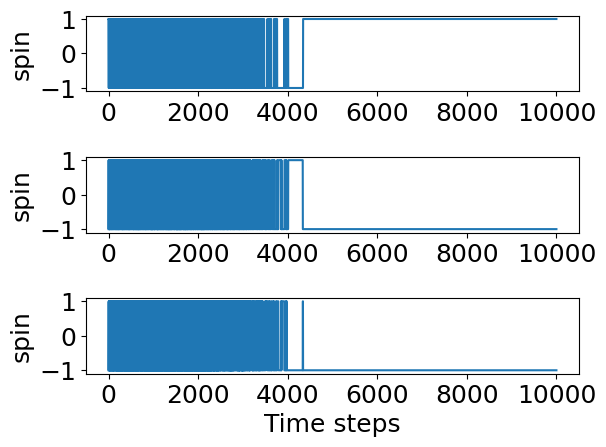

In [11]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(states.T[0])
ax1.set_ylabel("spin")

ax2.plot(states.T[1])
ax2.set_ylabel("spin")

ax3.plot(states.T[2])
ax3.set_ylabel("spin")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

## Linear

In [13]:
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_ising(hm, Jm, beta_schedule_type="linear", num_sweeps=10000)

In [14]:
states_linear = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/state.txt")
p_flip_linear = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/p_flip.txt")
beta_linear = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/beta.txt")

np.save('linear/states.npy', states)
np.save('linear/p_flip.npy', p_flip)
np.save('linear/beta.npy', beta)

In [15]:
ens_linear = [lci.calc_en(s) for s in states_linear]

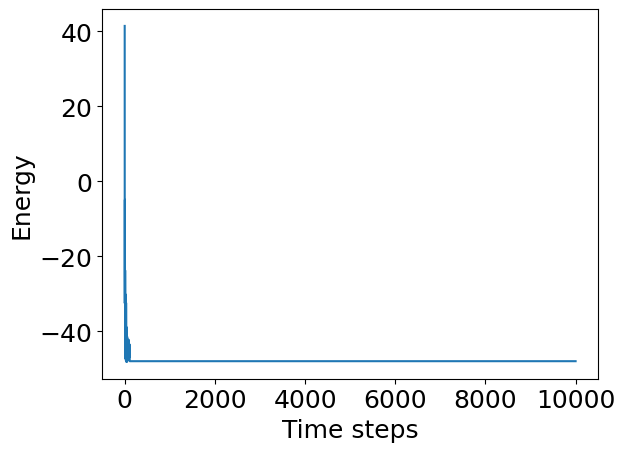

In [16]:
plt.plot(ens_linear)
plt.xlabel("Time steps")
plt.ylabel("Energy")
plt.show()

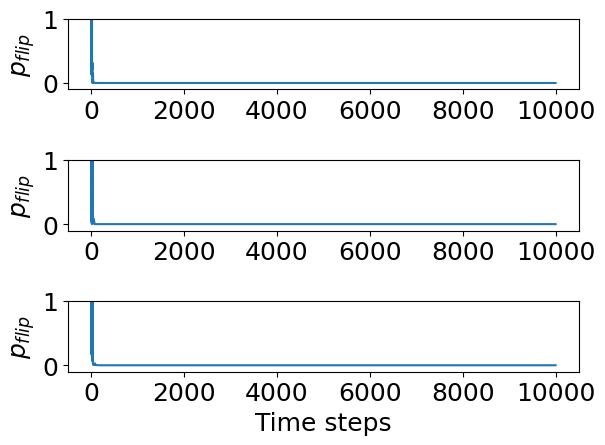

In [17]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(p_flip_linear.T[0])
ax1.set_ylim(-0.1, 1)
ax1.set_ylabel("$p_{flip}$")

ax2.plot(p_flip_linear.T[1])
ax2.set_ylim(-0.1, 1)
ax2.set_ylabel("$p_{flip}$")

ax3.plot(p_flip_linear.T[2])
ax3.set_ylim(-0.1, 1)
ax3.set_ylabel("$p_{flip}$")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

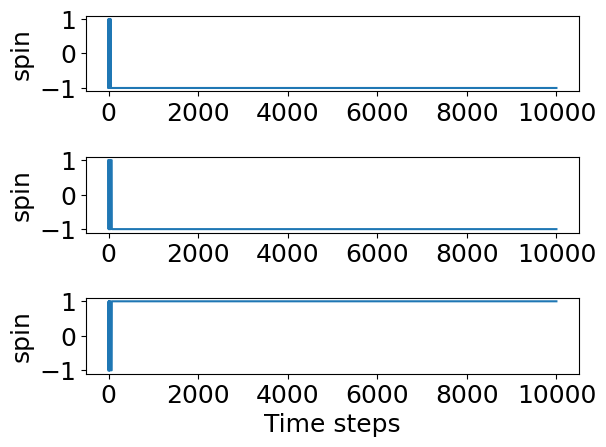

In [18]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(states_linear.T[0])
ax1.set_ylabel("spin")

ax2.plot(states_linear.T[1])
ax2.set_ylabel("spin")

ax3.plot(states_linear.T[2])
ax3.set_ylabel("spin")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

## $p_s$

In [23]:
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_ising(hm, Jm, num_sweeps=10000, num_reads=100)

In [47]:
ens_hundred = np.array([lci.calc_en(s) for s in sampleset.record["sample"]])
np.save('geometric/energies.npy', ens_hundred)

In [49]:
sum(ens_hundred <= lci.calc_ref_en()) / 100

0.03

In [50]:
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_ising(hm, Jm, beta_schedule_type="linear", num_sweeps=10000, num_reads=100)

In [51]:
ens_hundred_linear = np.array([lci.calc_en(s) for s in sampleset.record["sample"]])
np.save('linear/energies.npy', ens_hundred_linear)

In [52]:
sum(ens_hundred_linear <= lci.calc_ref_en()) / 100

0.04

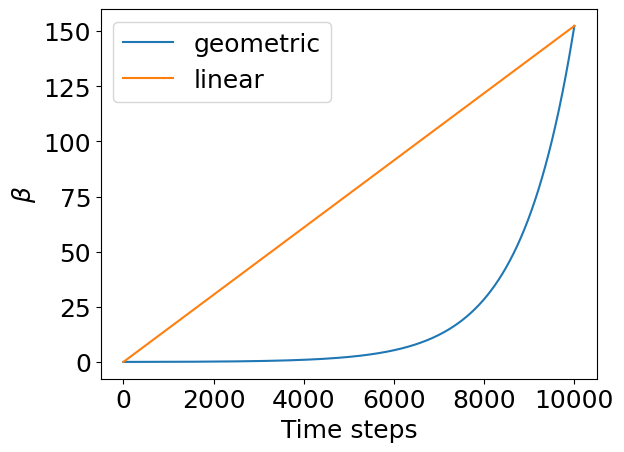

In [22]:
plt.plot(beta, label="geometric")
plt.plot(beta_linear, label="linear")
plt.xlabel("Time steps")
plt.ylabel("$\u03B2$")
plt.legend()
plt.show()

## Trial

In [66]:
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_ising(hm, Jm, beta_range=[0.01, 10], beta_schedule_type="linear", num_sweeps=10000, num_reads=100)

In [67]:
ens_hundred_linear_upto10 = np.array([lci.calc_en(s) for s in sampleset.record["sample"]])
np.save('linear/energies_upto10.npy', ens_hundred_linear_upto10)

In [68]:
sum(ens_hundred_linear_upto10 <= lci.calc_ref_en()) / 100

0.04

In [69]:
states_linear_upto10 = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/state.txt")
p_flip_linear_upto10 = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/p_flip.txt")
beta_linear_upto10 = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/beta.txt")

np.save('linear/states_upto10.npy', states_linear_upto10)
np.save('linear/p_flip_upto10.npy', p_flip_linear_upto10)
np.save('linear/beta_upto10.npy', beta_linear_upto10)

In [70]:
ens_linear_upto10 = [lci.calc_en(s) for s in states_linear_upto10]

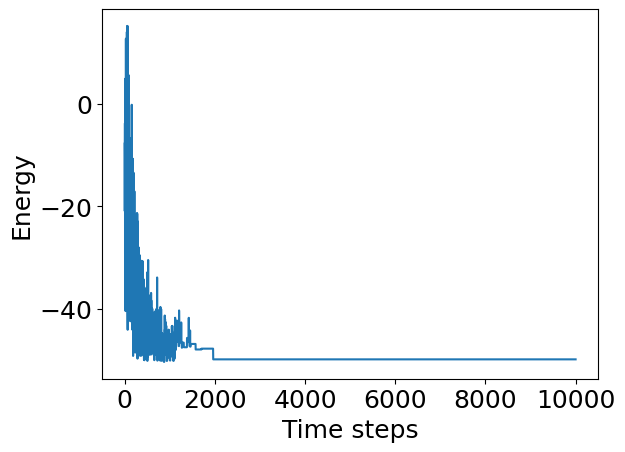

In [71]:
plt.plot(ens_linear_upto10)
plt.xlabel("Time steps")
plt.ylabel("Energy")
plt.show()

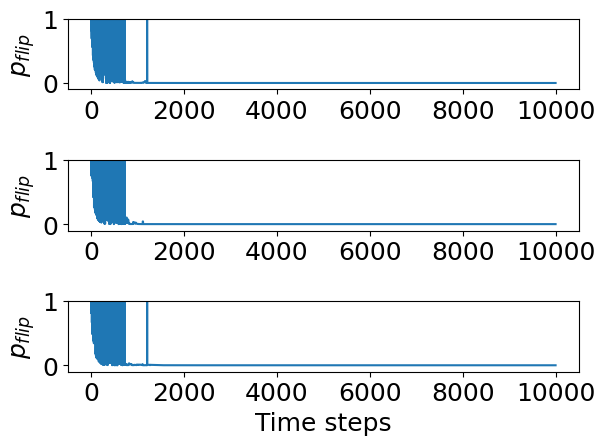

In [72]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(p_flip_linear_upto10.T[0])
ax1.set_ylim(-0.1, 1)
ax1.set_ylabel("$p_{flip}$")

ax2.plot(p_flip_linear_upto10.T[1])
ax2.set_ylim(-0.1, 1)
ax2.set_ylabel("$p_{flip}$")

ax3.plot(p_flip_linear_upto10.T[2])
ax3.set_ylim(-0.1, 1)
ax3.set_ylabel("$p_{flip}$")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

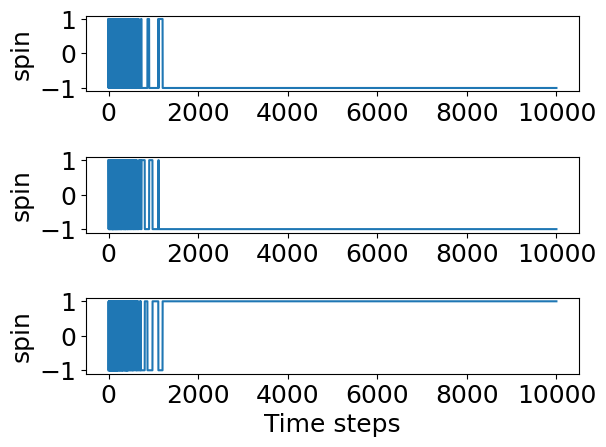

In [73]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(states_linear_upto10.T[0])
ax1.set_ylabel("spin")

ax2.plot(states_linear_upto10.T[1])
ax2.set_ylabel("spin")

ax3.plot(states_linear_upto10.T[2])
ax3.set_ylabel("spin")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

In [78]:
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_ising(hm, Jm, beta_range=[0.01, 10], num_sweeps=10000, num_reads=100)

In [79]:
ens_hundred_upto10 = np.array([lci.calc_en(s) for s in sampleset.record["sample"]])
np.save('geometric/energies_upto10.npy', ens_hundred_upto10)

In [80]:
sum(ens_hundred_upto10 <= lci.calc_ref_en()) / 100

0.03

In [81]:
states_upto10 = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/state.txt")
p_flip_upto10 = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/p_flip.txt")
beta_upto10 = np.loadtxt("/home/synoarray/kumagai/dwave-neal/lab/beta.txt")

np.save('linear/states_upto10.npy', states)
np.save('linear/p_flip_upto10.npy', p_flip)
np.save('linear/beta_upto10.npy', beta)

In [82]:
ens_upto10 = [lci.calc_en(s) for s in states_upto10]

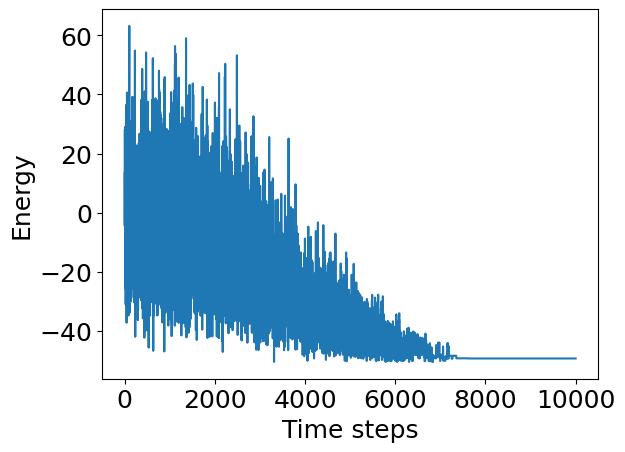

In [83]:
plt.plot(ens_upto10)
plt.xlabel("Time steps")
plt.ylabel("Energy")
plt.show()

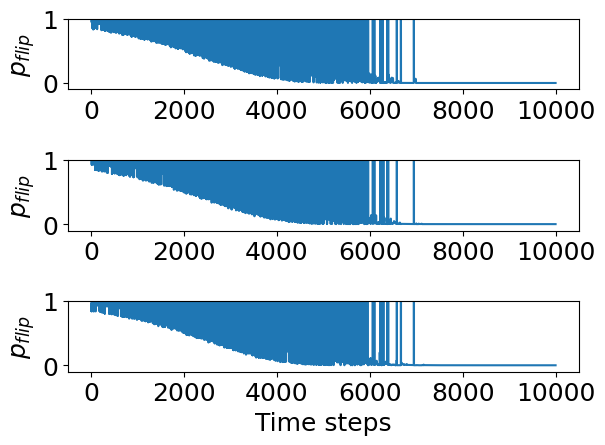

In [84]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(p_flip_upto10.T[0])
ax1.set_ylim(-0.1, 1)
ax1.set_ylabel("$p_{flip}$")

ax2.plot(p_flip_upto10.T[1])
ax2.set_ylim(-0.1, 1)
ax2.set_ylabel("$p_{flip}$")

ax3.plot(p_flip_upto10.T[2])
ax3.set_ylim(-0.1, 1)
ax3.set_ylabel("$p_{flip}$")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

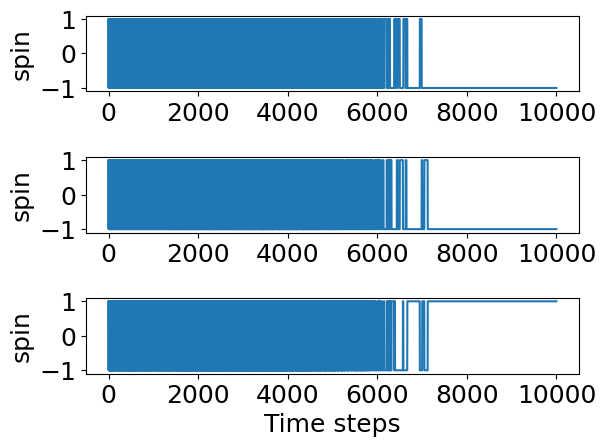

In [85]:
# サブプロットの作成
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8))

# グラフの描画
ax1.plot(states_upto10.T[0])
ax1.set_ylabel("spin")

ax2.plot(states_upto10.T[1])
ax2.set_ylabel("spin")

ax3.plot(states_upto10.T[2])
ax3.set_ylabel("spin")
ax3.set_xlabel("Time steps")

# レイアウトの調整
plt.tight_layout()

# グラフの表示
plt.show()

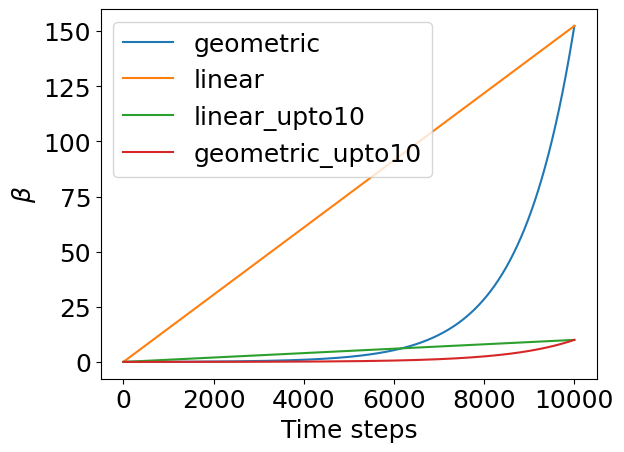

In [86]:
plt.plot(beta, label="geometric")
plt.plot(beta_linear, label="linear")
plt.plot(beta_linear_upto10, label="linear_upto10")
plt.plot(beta_upto10, label="geometric_upto10")
plt.xlabel("Time steps")
plt.ylabel("$\u03B2$")
plt.legend()
plt.show()